<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/2_stratified_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.analyseup.com/python-machine-learning/stratified-kfold.html

- https://www.youtube.com/watch?v=ZnSJgIULMVY ---> K-Fold, Stratified, Leave One Out, Repeated K-Fold Cross Validation

-------------------

- target here is the Returned_Units column which will be either 1 or 0.

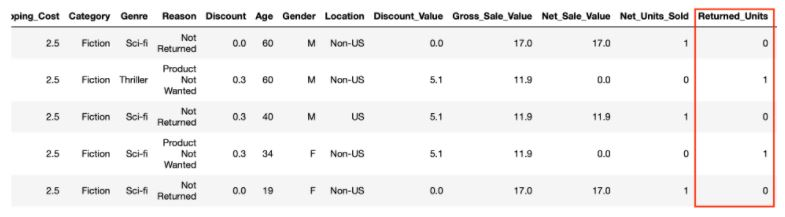

- Let’s have a quick check to see what the class ratio looks like for this column.

In [ ]:
print('Class Ratio:', sum(df['Returned_Units'])/len(df['Returned_Units']))

> Class Ratio: 0.216

- As you can see in our data, **21.6%** of the time a **product is returned**. When we create our folds we want **each split to have this same percentage of returns.**

-----------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import time
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, LeaveOneOut,RepeatedKFold, train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Telco-Customer-Churn.zip")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df['Churn_label'] = pd.factorize(df['Churn'])[0]

In [6]:
df.drop(['customerID', 'Churn'], axis=1, inplace=True)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_label
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [8]:
X = df.drop('Churn_label', axis=1)
y = df['Churn_label']

In [14]:
num_cols = X.select_dtypes(include=np.number).columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [15]:
cat_cols = X.select_dtypes(exclude=np.number).columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [16]:
ct = ColumnTransformer([
    ('rob', RobustScaler(), num_cols),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
])

In [17]:
pipe = Pipeline([
    ('ct_step', ct),
    ('model', RandomForestClassifier(n_estimators=10, random_state=0))
])

### **Stratified KFold**

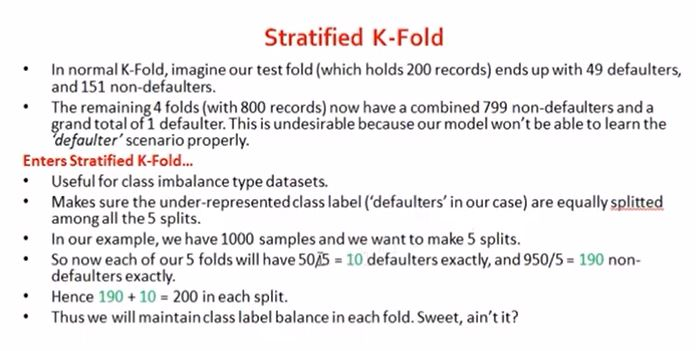

In [9]:
df['Churn_label'].value_counts()

0    5174
1    1869
Name: Churn_label, dtype: int64

In [10]:
1869/5

373.8

In [11]:
5174/5

1034.8

In [12]:
skf = StratifiedKFold(n_splits=5)

In [18]:
scores_skf = []
i = 1
for train_set, test_set in skf.split(X, y):
    pipe.fit(X.loc[train_set], y[train_set])
    sco = pipe.score(X.loc[test_set], y[test_set])
    scores_skf.append(sco)
    print("iteration ", i)
    i += 1

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5


In [19]:
scores_skf

[0.7828246983676366,
 0.7792760823278921,
 0.765791341376863,
 0.7776988636363636,
 0.7805397727272727]

In [20]:
i = 1
for train_set, test_set in skf.split(X=X, y=y):
    print("iteration ", i)
    print(train_set, " having :" , len(train_set))
    print(test_set, " having :" , len(test_set))
    print()
    print("y train counts: \n", y[train_set].value_counts())
    print("y test counts: \n", y[test_set].value_counts())
    print("-------------------------")
    i += 1

iteration  1
[1408 1409 1411 ... 7040 7041 7042]  having : 5634
[   0    1    2 ... 1406 1407 1410]  having : 1409

y train counts: 
 0    4139
1    1495
Name: Churn_label, dtype: int64
y test counts: 
 0    1035
1     374
Name: Churn_label, dtype: int64
-------------------------
iteration  2
[   0    1    2 ... 7040 7041 7042]  having : 5634
[1408 1409 1411 ... 2862 2869 2871]  having : 1409

y train counts: 
 0    4139
1    1495
Name: Churn_label, dtype: int64
y test counts: 
 0    1035
1     374
Name: Churn_label, dtype: int64
-------------------------
iteration  3
[   0    1    2 ... 7040 7041 7042]  having : 5634
[2805 2806 2807 ... 4266 4269 4272]  having : 1409

y train counts: 
 0    4139
1    1495
Name: Churn_label, dtype: int64
y test counts: 
 0    1035
1     374
Name: Churn_label, dtype: int64
-------------------------
iteration  4
[   0    1    2 ... 7040 7041 7042]  having : 5635
[4207 4208 4209 ... 5643 5644 5646]  having : 1408

y train counts: 
 0    4139
1    1496
Nam

In [21]:
result_kf = cross_val_score(estimator=pipe, X=X, y=y, scoring='accuracy', cv=5)

In [22]:
result_kf

array([0.7828247 , 0.77927608, 0.76579134, 0.77769886, 0.78053977])

In [23]:
start = time.time()
result_kf10 = cross_val_score(estimator=pipe, X=X, y=y, scoring='accuracy', cv=KFold(n_splits=10))
result_kf10
print("time taken: ", time.time()-start)

time taken:  18.33046531677246


In [24]:
result_kf10

array([0.78014184, 0.78865248, 0.78156028, 0.78409091, 0.76988636,
       0.75568182, 0.78125   , 0.765625  , 0.77130682, 0.77840909])